In [77]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

In [78]:
games=pd.read_csv("gamesdataset.csv", encoding="latin1")
games.category=games.category.astype(str)

# How does a game's category influence its rating?

In [79]:
category_db=games.category.str.split(',', expand=True)
category_db.stack().value_counts()
category_db=pd.concat([category_db, games["year"], games["average"], games["geekscore"]], axis=1, join="inner")
category_db[0]=category_db[0].replace("nan", np.nan)
averages=games.average.round()
catcrosstab=pd.crosstab(index=category_db[0], columns=averages, margins=True)
catcrosstab

average,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
0,,,,,,,,,,,
Abstract Strategy,0,1,15,114,429,1014,642,141,5,1,2362
Action / Dexterity,1,4,12,141,394,574,238,37,1,0,1402
Adventure,0,2,12,56,155,300,193,70,14,0,802
Age of Reason,0,0,0,1,7,49,67,23,2,0,149
American Civil War,0,0,3,5,20,96,125,48,1,0,298
American Indian Wars,0,0,1,0,2,8,11,9,0,0,31
American Revolutionary War,0,0,0,0,2,6,9,5,0,0,22
American West,0,0,1,13,36,65,38,6,0,0,159
Ancient,0,0,1,19,45,211,221,54,2,0,553


This helps us see the distribution of a game's rating by category, and it also helps us see how dominant some particular categories are for gamers. But it's not that well arranged, and thus, isn't all that informative or useful.

In [80]:
cats=category_db.loc[:,0]
cats=list(set(cats))
cats=cats[1:]  # a list of all categories
categorydf=pd.concat([games["category"],games["average"], games["geekscore"], games["year"]], axis=1) # a dataframe of categories

In [81]:
d={}
for i in cats:
    d[i]=categorydf[categorydf.category.str.contains(i)] #a dictionary with all instances of a particular category in it
df_list=[]
averages=[]
geekscores=[]
medianaverage=[]
for x,y in d.items():
    df_list.append(y)  #appended this all to a list
for i in df_list:
    averages.append(i["average"].mean())
    geekscores.append(i["geekscore"].mean())  
    medianaverage.append(i["average"].median()) #pulled out relevant stats for each category of game
header=["category", "average", "meangeekscore", "medianaverage"]
categ=pd.DataFrame(data=[cats,averages, geekscores, medianaverage]) #put them in a dataframe
categ=categ.transpose()
categ.columns=header

In [82]:
categ.sort_values("average", ascending=False).head(20) #the top twenty types of games by average (just user ratings--not weighted)

,category,average,meangeekscore,medianaverage
32,Miniatures,6.8043,1.83113,6.91988
45,Game System,6.79292,2.24524,6.8104
72,Expansion for Base-game,6.78699,1.4415,7.1
26,Post-Napoleonic,6.7858,3.62574,6.63579
29,American Revolutionary War,6.77327,3.31769,6.96185
63,American Indian Wars,6.76681,2.23789,6.92941
71,Korean War,6.75767,2.82176,6.81894
10,Civilization,6.75498,3.55325,6.87877
48,Napoleonic,6.74764,2.91125,6.78784
36,Age of Reason,6.74154,3.56067,6.74108


So what seems clear here is that war games tend to be the highest rated (accounting for most of the top ten). I would bet that the prevalence of games from the early modern period has something to do with a fairly low prevalence of these games. But the wargame's prevalence seems meaningful, as does the high place of the miniature category and the expansion to a base game, as these are probably games with fairly interested game playing audiences (perhaps also true of the war game more generally).

In [83]:
categ.sort_values("meangeekscore", ascending=False).head(20)

,category,average,meangeekscore,medianaverage
77,City Building,6.53161,3.8793,6.59133
43,Renaissance,6.59512,3.75607,6.57791
26,Post-Napoleonic,6.7858,3.62574,6.63579
16,Arabian,6.13217,3.56169,6.16599
36,Age of Reason,6.74154,3.56067,6.74108
10,Civilization,6.75498,3.55325,6.87877
6,Territory Building,6.54157,3.5327,6.56276
81,Aviation / Flight,6.3595,3.49743,6.43144
34,Industry / Manufacturing,6.4127,3.46639,6.43447
7,Ancient,6.39481,3.37654,6.45516


The geekscore is (in general) much lower than the average, and it seems to prioritize games of a somewhat different genre, such as trains, ancient, nautrical, territory building, and civilization, most of which do not have the same prominence in the above list. Geekscores are crowdsourced from a particular community of users of the site, and thus, tend to be much more selective, and focus on a more euro style game than a war game. 

In [84]:
categ.sort_values("medianaverage", ascending=False).head(20)

,category,average,meangeekscore,medianaverage
72,Expansion for Base-game,6.78699,1.4415,7.1
29,American Revolutionary War,6.77327,3.31769,6.96185
63,American Indian Wars,6.76681,2.23789,6.92941
32,Miniatures,6.8043,1.83113,6.91988
10,Civilization,6.75498,3.55325,6.87877
71,Korean War,6.75767,2.82176,6.81894
45,Game System,6.79292,2.24524,6.8104
48,Napoleonic,6.74764,2.91125,6.78784
36,Age of Reason,6.74154,3.56067,6.74108
60,Vietnam War,6.50972,2.91571,6.68818


The median rating returns us to (primarily) war games again. Note also the prominence of expansions, whose median rating is very high. This illustrates an interesting dynamic, inasmuch as the players who take the time to rate games tend to like expansions, even though they have very low geekscores. 

There are some interesting trends here, namely the different prominence of war games and euro games, and I may have to spend more time being more precise with the labels to derive more specific insights from this categorical data.

# How have games changed between the 20th century and the 2000s?

More games were produced in the 2000s than in the 20th century. One outgrowth of that is that the distribution of categories of games is significantly different.

In [85]:
twothousands=games[games.year > 2000]
twothousands.year=twothousands.year.astype(int)
twencent=games[(games.year < 2000) & (games.year > 1900)]  #building twentieth century and two thousands dataframes

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [86]:
category_db_twencent=twencent.category.str.split(',', expand=True)
twencat=category_db_twencent.stack().value_counts()
category_db_twothousands=twothousands.category.str.split(',', expand=True)
category_db_twothousands=category_db_twothousands.replace("nan", np.nan)
twothoucat=category_db_twothousands.stack().value_counts()  #making value counts based on twencent and twothousands dataframes
stats.ttest_ind(twothoucat, twencat)

Ttest_indResult(statistic=3.1488279161596613, pvalue=0.0019442184816326335)

So what this t test suggests is that part of the shift during the 2000s is a change in the distribution of categories and values, as there is a significant statistical difference between the two. 

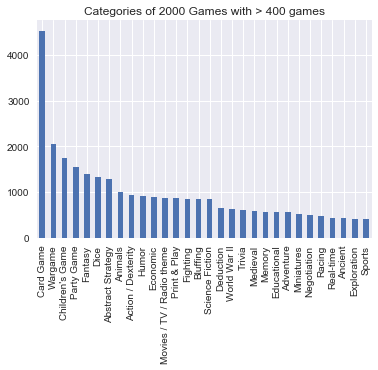

In [87]:
twothoupop=twothoucat[twothoucat > 400]
twothoupop.plot(kind="bar")
plt.title("Categories of 2000 Games with > 400 games")

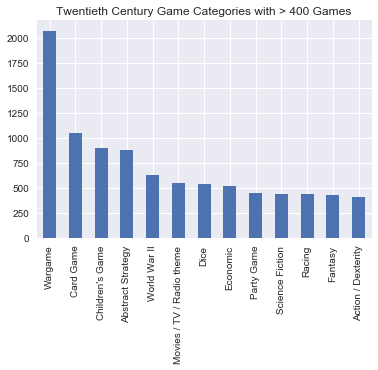

In [88]:
twencatpop=twencat[twencat > 400]
twencatpop.plot(kind="bar")
plt.title("Twentieth Century Game Categories with > 400 Games")

Note that there are far fewer categories with over 400 games in twentieth century games than there are in games from the 2000s. Wargames are the most twentieth century games (twice as many as card games), whereas card games in the 2000s are double war games (there is some overlap, surely, but the raw numbers are significant. 

37

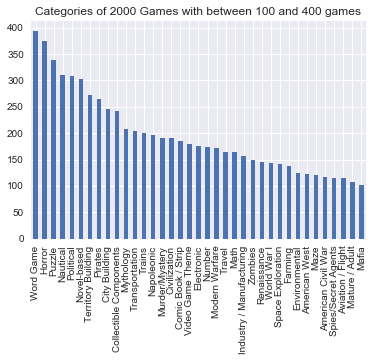

In [89]:
twothoumid=twothoucat[(twothoucat < 400) & (twothoucat > 100)]
twothoumid.plot(kind="bar")
plt.title("Categories of 2000 Games with between 100 and 400 games")
len(twothoumid)

31

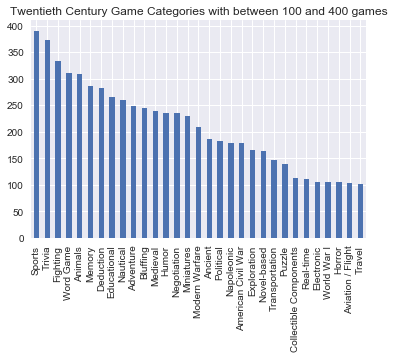

In [90]:
twencatmid=twencat[(twencat < 400) & (twencat > 100)]
twencatmid.plot(kind="bar")
plt.title("Twentieth Century Game Categories with between 100 and 400 games")
len(twencatmid)

Note that many of the categories in the second graph are represented in the > 400 graph. There are also less categories in the twentieth century graph than in the two thousands graph. Whole new categories are found in the 2000s, such as Pirates, Trains, Space Exploration, and Farming, which do not exist in the earlier graph. So part of the transition was a change in the types of games that were produced, and perhaps a bit suggestively, a move towards a more wider audienence for games, which came with both more general production (i.e. card games, party games), but also more specialized niche games.

C:\Users\test\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


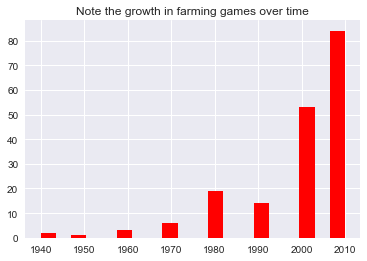

In [91]:
games.category=games.category.astype(str)
farming=games[games.category.str.contains("Farming")]
farming["decade"]=farming.year//10*10
farming=farming[farming.decade > 1900.0]
farming.decade.hist(bins=20, color="red")
plt.title("Note the growth in farming games over time") #this is just an example section, and it's a way to confirm my asssumption that the categories of games changed

So far the most significant point that I have found is the difference between games in the 2000s and the rest of the 20th century.

# Did the Mechanics of Games Change in the 2000s?

In [92]:
mech_twencent=twencent.mechanic.str.split(',', expand=True)
twenmech=mech_twencent.stack().value_counts()
mech_twothousands=twothousands.mechanic.str.split(',', expand=True)
twothoumech=mech_twothousands.stack().value_counts()  #making value counts based on twencent and twothousands dataframes
stats.ttest_ind(twothoumech, twenmech)

Ttest_indResult(statistic=3.6331637310594926, pvalue=0.00044399804281258277)

Based on this t test, there seems to be a highly significant change in the distribution of mechanics. 

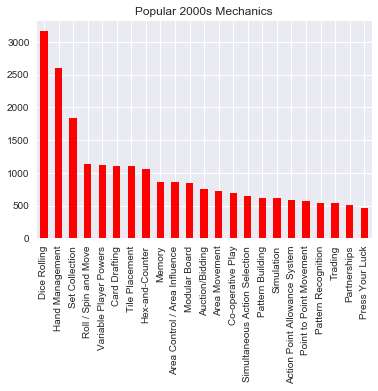

In [93]:
twothoumechpop=twothoumech[twothoumech > 400]
twothoumechpop.plot(kind="bar", color="red")
plt.title("Popular 2000s Mechanics")

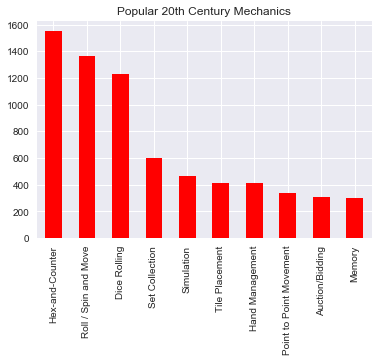

In [94]:
twenmechpop=twenmech[twenmech > 300]
twenmechpop.plot(kind="bar", color="red")
plt.title("Popular 20th Century Mechanics")

Note the heavy emphasis on hex-and-counter games in the twentieth century (most closely associated with wargames), whereas there is much more diversity of game mechanics in the 2000s. As suggested above, one of the changes in the 2000s was a broader audience for games, which would be born out by this evidence.

# Have Games Gotten Better? 

In [95]:
games.year=games.year.astype(float)
twencent=games[(games.year > 1930) & (games.year <2000)]

In [96]:
twencent.geekscore=twencent.geekscore.replace(0, np.nan)
twothousands.geekscore=twothousands.geekscore.replace(0, np.nan)

C:\Users\test\Anaconda3\lib\site-packages\pandas\core\generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


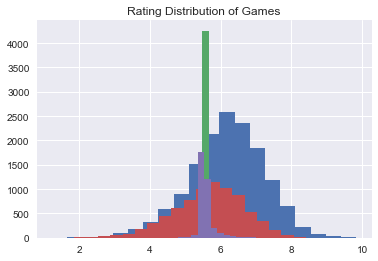

In [129]:
x=twothousands.average.hist(bins=20)
y=twothousands.geekscore.hist(bins=20)
z=twencent.average.hist(bins=20)
w=twencent.geekscore.hist(bins=20)
plt.title("Rating Distribution of Games")

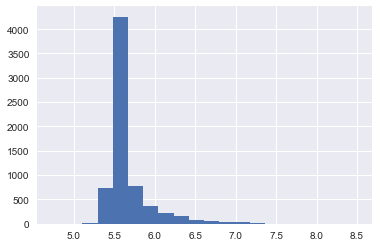

In [98]:
twothousands.geekscore.hist(bins=20)

In [99]:
print(stats.ttest_ind(twothousands.average, twencent.average))

Ttest_indResult(statistic=34.882802256380444, pvalue=1.1041829401430259e-259)


The average rating of games has increased dramatically post 2000, as is shown by the highly significant t statistic comparing the twentieth century average and the 2000s average. One aspect of this is that more and better games are being produced, as is illustrated in the chart above. The geekscores have trended up, but not in a statistically significant way. Indeed, the geekscore for the games of the twentieth century is only slightly lower than that of the 2000s. One way to interpret this change is that there is more involvement in games, and thus more purchasing and more rating of games in the 2000s. 

# Regression Analysis (looking for correlations)

                            OLS Regression Results                            
Dep. Variable:            numcomments   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                 1.761e+05
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:08:01   Log-Likelihood:            -1.3374e+05
No. Observations:               23661   AIC:                         2.675e+05
Df Residuals:                   23660   BIC:                         2.675e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
owned          0.1915      0.000    419.617      0.0

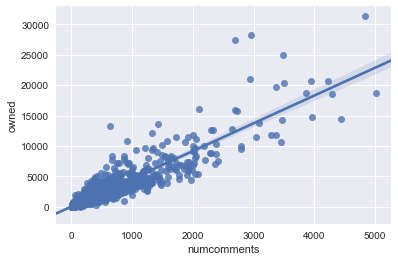

In [100]:
comments=games[games.numcomments > 0]
mod=sm.OLS(comments.numcomments, comments.average).fit()
mod=sm.OLS(comments.numcomments, comments.owned).fit()
print(mod.summary())
sns.regplot("numcomments", "owned", data=comments)

The Number of Comments and the Count of Owned Games tend to be highly correlated.

                            OLS Regression Results                            
Dep. Variable:            numcomments   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                 3.551e+05
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:08:03   Log-Likelihood:            -1.2617e+05
No. Observations:               23661   AIC:                         2.523e+05
Df Residuals:                   23660   BIC:                         2.523e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
usersrated     0.2785      0.000    595.873      0.0

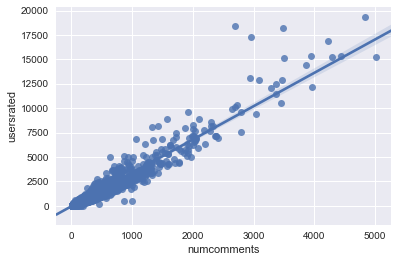

In [101]:
mod=sm.OLS(comments.numcomments, comments.usersrated).fit()
print(mod.summary())
sns.regplot("numcomments", "usersrated", data=comments)

The Number of Comments and the Count of User Ratings of Games tend to be correlated. This makes sense, since they are probably measuring the same thing.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                average   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 6.935e+05
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:08:05   Log-Likelihood:                -12494.
No. Observations:               10782   AIC:                         2.499e+04
Df Residuals:                   10781   BIC:                         2.500e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
geekscore      1.0956      0.001    832.788      0.000       1.093       1.098
==============================================================================
Omnibus:                      391.532   Durbin-Watson:                   1.724
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1135.659
Skew:                          -0.073   Prob(JB):                    2.48e-247
Kurtosis:                       4.583   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

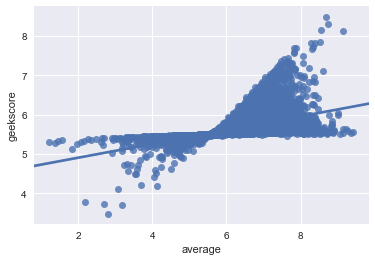

In [102]:
gs=games[games.geekscore > 0]
sns.regplot("average", "geekscore", data=gs)
mod=sm.OLS(gs.average, gs.geekscore).fit()
mod.summary() #appears to be a semi-linear relationship between average and geekscore

There is some relationship here between averages and geekscores. It seems like higher averages have higher geekscores and lower averages have lower geekscores, although on balance, all geekscores tend to be almost linear. I'm not sure linear regression is the best model here. 

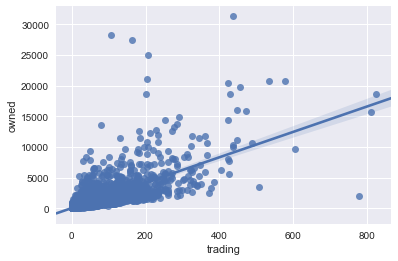

In [109]:
mod=sm.OLS(games.trading, games.owned).fit()
mod.summary()
sns.regplot(games.trading, games.owned)

It seems like there's a semi-linear relationship here as well, but again, a precondition of trading a game is owning it.

                            OLS Regression Results                            
Dep. Variable:                 weight   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 6.791e+04
Date:                Sun, 09 Jul 2017   Prob (F-statistic):               0.00
Time:                        23:42:53   Log-Likelihood:                -12625.
No. Observations:               10782   AIC:                         2.525e+04
Df Residuals:                   10781   BIC:                         2.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
geekscore      0.3470      0.001    260.596      0.0

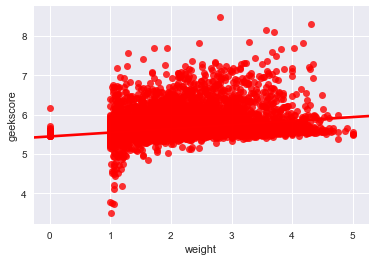

In [111]:
mod=sm.OLS(gs.weight, gs.geekscore).fit()
print(mod.summary())
sns.regplot("weight", "geekscore", color="red", data=gs)

There's a small linear relationshp here, it looks like (weight=complexity).

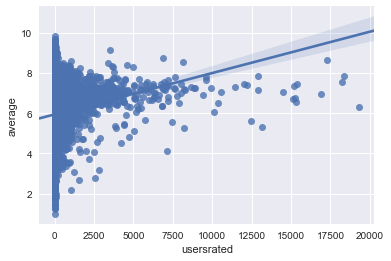

In [116]:
sns.regplot("usersrated", "average", data=games)

This seems like there is a relationship, but a nonlinear one.

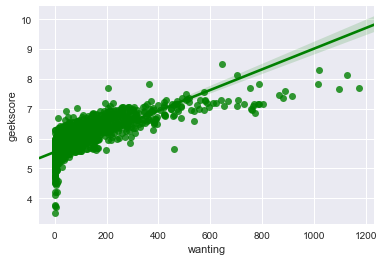

In [115]:
sns.regplot("wanting", "geekscore", color="green", data=gs)

# Conclusions

* The most significant difference in this dataset is based on time; the 2000s and pre-2000 games are radically different from each other.
* This difference extends to categories, mechanics, and ratings. I speculate that this might be part of a transition from wargames to Euro games.
* Categories and Mechanics also play a role in ratings differences, but I have to figure out a better set of methods for accounting for that difference.
* There are some fairly strong linear regression correlations in the data, and I have laid them out above. Some of these are surprising, but others reflect relationships of dependency between specific variables.
* Going forward, I think there are potentially three models/questions to investigate. First, what factors provides a game with good ratings (including both geekscore and average)? This strikes as a multiple linear regression model. Second, what makes a game commericially successful? I plan to get price data from Board Game Geek and to look at copies owned/wanted as a sample of commercial success, while being aware that this material does not tell the whole story. Finally, this research has found that there are two main categories of games, whose primary feature is temporal. I'd like to make a classification model that accounts for the difference between pre and post 2000 games (inasmuch as war games and euro games are used in a vague sense--and maybe there's more to do here). 